<a href="https://colab.research.google.com/github/asrianda/matakuliah/blob/main/MTI_7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jumlah data: 700

Cek nilai kosong:
 ID               0
Aset             0
Prob             0
Impact           0
Capex            0
OpexY            0
MaintY           0
Years            0
Benefit          0
Risk             0
TCO              0
ROI              0
Criticality      0
Risk_n           0
Criticality_n    0
TCO_n            0
ROI_pos          0
Priority_raw     0
Priority_norm    0
dtype: int64

== 20 Aset TI Prioritas Tertinggi ==
  ID       Aset  Prob  Impact Risk Criticality           TCO    ROI Priority_raw Priority_norm
A682   Firewall  0.35       8 2.80        3.22 Rp 30,000,000 670.0%         2.32 684601675.659
A422   Software  0.83       9 7.47        4.63 Rp 48,000,000 354.2%         3.27        34.229
A507     Router  0.83       8 6.64        4.58 Rp 47,000,000 334.0%         2.81        29.748
A025    Storage  0.37       5 1.85        4.39 Rp 36,000,000 547.2%         1.46        20.648
A333   Database  0.89       9 8.01        3.79 Rp 56,000,000 308.9%         

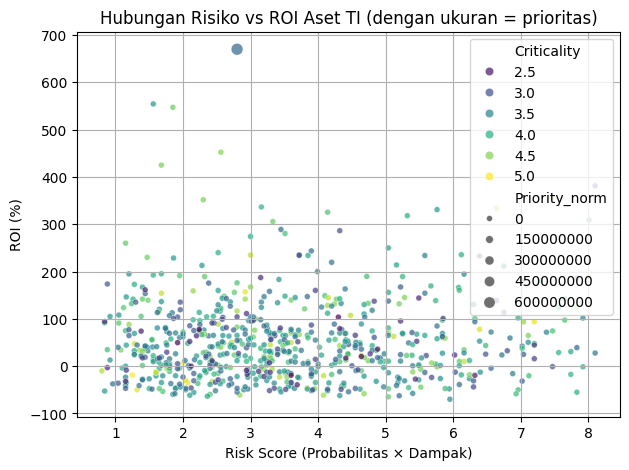

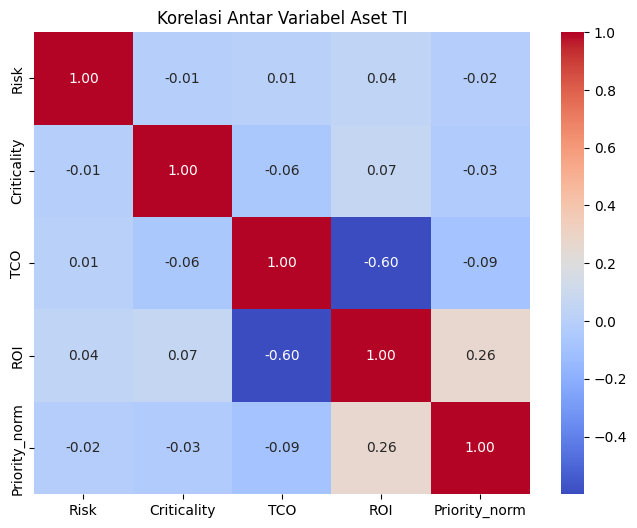


✅ Hasil analisis disimpan ke file: hasil_analisis_aset_TI_700.csv


In [4]:
# ============================================================
# PROGRAM ANALISIS RISIKO & NILAI ASET TI
# Menggunakan dataset_aset_TI_700.csv
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1. Membaca dataset hasil simulasi
# -------------------------
file_path = "Dataset_Aset_TI_700.csv"  # ubah jika file berada di lokasi lain
df = pd.read_csv(file_path)

# -------------------------
# 2. Pemeriksaan dan pembersihan data
# -------------------------
print("Jumlah data:", len(df))
print("\nCek nilai kosong:\n", df.isnull().sum())

# Hapus record dengan nilai kosong atau tidak valid
df = df.dropna()

# Jika ada ROI ekstrem negatif, set ke 0 (artinya tidak memberi keuntungan)
df["ROI_pos"] = np.maximum(df["ROI"], 0)

# -------------------------
# 3. Normalisasi nilai risiko, criticality, dan TCO
# -------------------------
def minmax(x):
    x = x.astype(float)
    return (x - x.min()) / (x.max() - x.min() + 1e-12)

df["Risk_n"] = minmax(df["Risk"])
df["Criticality_n"] = minmax(df["Criticality"])
df["TCO_n"] = minmax(df["TCO"])

# -------------------------
# 4. Perhitungan ulang prioritas investasi
# -------------------------
df["Priority_raw"] = (df["Risk"] * df["Criticality"] * (1 + df["ROI_pos"]/100.0)) / (df["TCO"]/1e6)
df["Priority_norm"] = (df["Risk_n"] * df["Criticality_n"] * (1 + df["ROI_pos"]/100.0)) / (df["TCO_n"] + 1e-9)

# -------------------------
# 5. Urutkan aset berdasarkan prioritas
# -------------------------
df_sorted = df.sort_values("Priority_norm", ascending=False)

# Pilih kolom utama untuk ditampilkan
cols_show = ["ID","Aset","Prob","Impact","Risk","Criticality","TCO","ROI","Priority_raw","Priority_norm"]
print("\n== 20 Aset TI Prioritas Tertinggi ==")
print(df_sorted[cols_show].head(20).to_string(index=False,
      formatters={
          "TCO": lambda x: f"Rp {x:,.0f}",
          "ROI": lambda x: f"{x:.1f}%",
          "Risk": lambda x: f"{x:.2f}",
          "Criticality": lambda x: f"{x:.2f}",
          "Priority_raw": lambda x: f"{x:.2f}",
          "Priority_norm": lambda x: f"{x:.3f}"
      }))

# -------------------------
# 6. Visualisasi Analitik
# -------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Risk", y="ROI", size="Priority_norm", hue="Criticality", palette="viridis", alpha=0.7)
plt.title("Hubungan Risiko vs ROI Aset TI (dengan ukuran = prioritas)")
plt.xlabel("Risk Score (Probabilitas × Dampak)")
plt.ylabel("ROI (%)")
plt.grid(True)
plt.show()

# Heatmap korelasi antar metrik
plt.figure(figsize=(8,6))
sns.heatmap(df[["Risk","Criticality","TCO","ROI","Priority_norm"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Aset TI")
plt.show()

# -------------------------
# 7. Simpan hasil akhir (diperbarui)
# -------------------------
output_file = "hasil_analisis_aset_TI_700.csv"
df_sorted.to_csv(output_file, index=False)
print(f"\n✅ Hasil analisis disimpan ke file: {output_file}")


Jumlah data awal: 700 record

Distribusi Kategori Prioritas:
 Kategori_Prioritas
Sedang    238
Tinggi    231
Rendah    231
Name: count, dtype: int64

== 20 Aset TI Prioritas Tertinggi ==
  ID       Aset  Prob  Impact Risk Criticality           TCO    ROI Priority_norm Kategori_Prioritas
A682   Firewall  0.35       8 2.80        3.22 Rp 30,000,000 670.0% 684601675.659             Tinggi
A422   Software  0.83       9 7.47        4.63 Rp 48,000,000 354.2%        34.229             Tinggi
A507     Router  0.83       8 6.64        4.58 Rp 47,000,000 334.0%        29.748             Tinggi
A025    Storage  0.37       5 1.85        4.39 Rp 36,000,000 547.2%        20.648             Tinggi
A333   Database  0.89       9 8.01        3.79 Rp 56,000,000 308.9%        14.468             Tinggi
A327 IoT Device  0.76       7 5.32        3.98 Rp 50,000,000 318.0%        13.678             Tinggi
A131     Router  0.64       4 2.56        4.49 Rp 44,000,000 452.3%        13.254             Tinggi
A469 

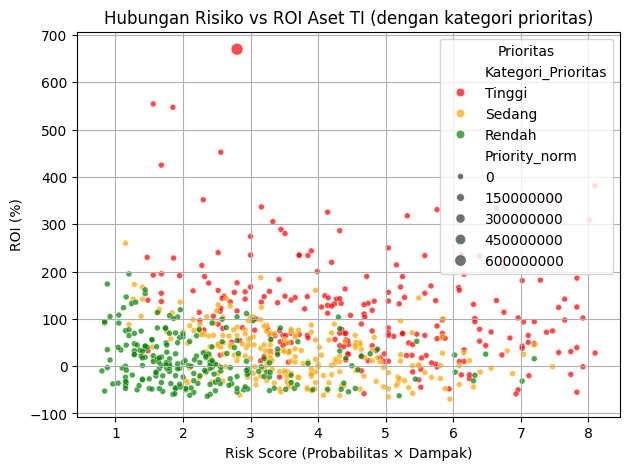

/tmp/ipython-input-1615739402.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Kategori_Prioritas", palette=["green","orange","red"])


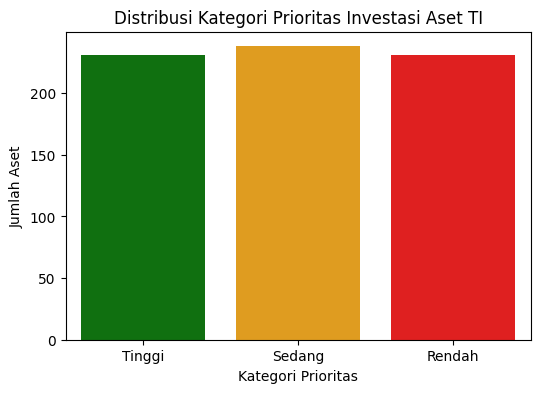

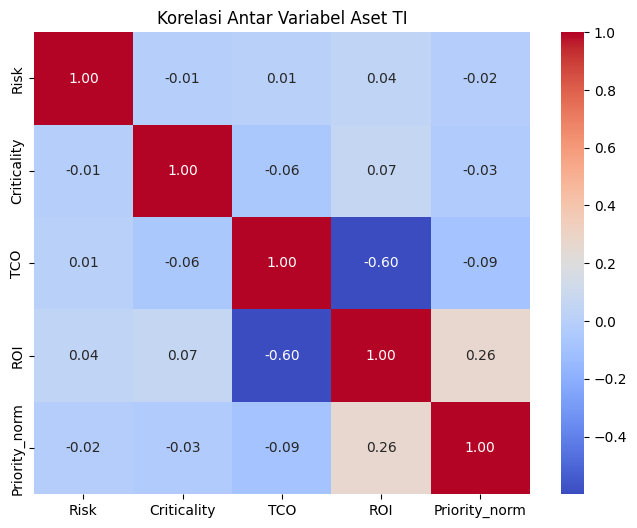


✅ Hasil analisis lengkap disimpan sebagai: hasil_final_analisis_aset_TI_700.csv


In [ ]:
# ============================================================
# FINAL PROGRAM ANALISIS RISIKO & NILAI ASET TI
# (Dengan Klasifikasi Prioritas)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1️⃣ Baca Dataset
# -------------------------
file_path = "Dataset_Aset_TI_700.csv"  # ganti path sesuai lokasi file Anda
df = pd.read_csv(file_path)

print(f"Jumlah data awal: {len(df)} record")

# -------------------------
# 2️⃣ Bersihkan & Siapkan Data
# -------------------------
df = df.dropna()
df["ROI_pos"] = np.maximum(df["ROI"], 0)

# Normalisasi fungsi
def minmax(x):
    x = x.astype(float)
    return (x - x.min()) / (x.max() - x.min() + 1e-12)

df["Risk_n"] = minmax(df["Risk"])
df["Criticality_n"] = minmax(df["Criticality"])
df["TCO_n"] = minmax(df["TCO"])

# -------------------------
# 3️⃣ Hitung Ulang Prioritas Investasi
# -------------------------
df["Priority_raw"] = (df["Risk"] * df["Criticality"] * (1 + df["ROI_pos"]/100.0)) / (df["TCO"]/1e6)
df["Priority_norm"] = (df["Risk_n"] * df["Criticality_n"] * (1 + df["ROI_pos"]/100.0)) / (df["TCO_n"] + 1e-9)

# -------------------------
# 4️⃣ Klasifikasi Prioritas
# -------------------------
q1, q2 = df["Priority_norm"].quantile([0.33, 0.67])
def kategori_prioritas(x):
    if x <= q1:
        return "Rendah"
    elif x <= q2:
        return "Sedang"
    else:
        return "Tinggi"

df["Kategori_Prioritas"] = df["Priority_norm"].apply(kategori_prioritas)

# -------------------------
# 5️⃣ Ringkasan Statistik
# -------------------------
summary = df["Kategori_Prioritas"].value_counts()
print("\nDistribusi Kategori Prioritas:\n", summary)

# -------------------------
# 6️⃣ 20 Aset Prioritas Tertinggi
# -------------------------
cols_show = ["ID","Aset","Prob","Impact","Risk","Criticality","TCO","ROI","Priority_norm","Kategori_Prioritas"]
df_sorted = df.sort_values("Priority_norm", ascending=False)
print("\n== 20 Aset TI Prioritas Tertinggi ==")
print(df_sorted[cols_show].head(20).to_string(index=False,
      formatters={
          "TCO": lambda x: f"Rp {x:,.0f}",
          "ROI": lambda x: f"{x:.1f}%",
          "Risk": lambda x: f"{x:.2f}",
          "Criticality": lambda x: f"{x:.2f}",
          "Priority_norm": lambda x: f"{x:.3f}"
      }))

# -------------------------
# 7️⃣ Visualisasi
# -------------------------

# Scatter plot Risk vs ROI
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Risk", y="ROI", hue="Kategori_Prioritas", size="Priority_norm",
                palette={"Tinggi":"red","Sedang":"orange","Rendah":"green"}, alpha=0.7)
plt.title("Hubungan Risiko vs ROI Aset TI (dengan kategori prioritas)")
plt.xlabel("Risk Score (Probabilitas × Dampak)")
plt.ylabel("ROI (%)")
plt.grid(True)
plt.legend(title="Prioritas")
plt.show()

# Distribusi kategori
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Kategori_Prioritas", palette=["green","orange","red"])
plt.title("Distribusi Kategori Prioritas Investasi Aset TI")
plt.xlabel("Kategori Prioritas")
plt.ylabel("Jumlah Aset")
plt.show()

# Heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df[["Risk","Criticality","TCO","ROI","Priority_norm"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Aset TI")
plt.show()

# -------------------------
# 8️⃣ Simpan hasil akhir
# -------------------------
output_file = "hasil_final_analisis_aset_TI_700.csv"
df_sorted.to_csv(output_file, index=False)
print(f"\n✅ Hasil analisis lengkap disimpan sebagai: {output_file}")


In [ ]:
# ============================================================
# SIMULASI INTERAKTIF RISIKO & NILAI ASET TI (COLAB WIDGET)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider

# --- Baca dataset hasil analisis sebelumnya ---
df = pd.read_csv("Dataset_Aset_TI_700.csv")

# --- Pilih subset agar visualisasi ringan ---
df = df.sample(50, random_state=42).reset_index(drop=True)

# --- Fungsi normalisasi & perhitungan ulang ---
def minmax(x):
    return (x - x.min()) / (x.max() - x.min() + 1e-12)

def hitung_prioritas(prob_factor=1.0, impact_factor=1.0, roi_factor=1.0):
    temp = df.copy()
    temp["Risk_adj"] = (temp["Prob"] * prob_factor) * (temp["Impact"] * impact_factor)
    temp["ROI_adj"] = temp["ROI"] * roi_factor
    temp["Risk_n"] = minmax(temp["Risk_adj"])
    temp["Criticality_n"] = minmax(temp["Criticality"])
    temp["TCO_n"] = minmax(temp["TCO"])
    temp["Priority_norm"] = (temp["Risk_n"] * temp["Criticality_n"] * (1 + np.maximum(temp["ROI_adj"],0)/100.0)) / (temp["TCO_n"] + 1e-9)

    plt.figure(figsize=(7,5))
    sns.scatterplot(data=temp, x="Risk_adj", y="ROI_adj", hue="Priority_norm", size="Criticality_n",
                    palette="coolwarm", alpha=0.8)
    plt.title("Simulasi Interaktif Risiko vs ROI (Aset TI)")
    plt.xlabel("Risk Adjusted")
    plt.ylabel("ROI Adjusted (%)")
    plt.legend(title="Prioritas")
    plt.grid(True)
    plt.show()

    top = temp.sort_values("Priority_norm", ascending=False).head(5)
    display(top[["ID","Aset","Risk_adj","ROI_adj","Criticality","Priority_norm"]])

# --- Interaksi slider ---
interact(
    hitung_prioritas,
    prob_factor=FloatSlider(value=1, min=0.5, max=1.5, step=0.1, description="Probabilitas ×"),
    impact_factor=FloatSlider(value=1, min=0.5, max=1.5, step=0.1, description="Dampak ×"),
    roi_factor=FloatSlider(value=1, min=0.5, max=1.5, step=0.1, description="ROI ×")
)


interactive(children=(FloatSlider(value=1.0, description='Probabilitas ×', max=1.5, min=0.5), FloatSlider(valu…

<function __main__.hitung_prioritas(prob_factor=1.0, impact_factor=1.0, roi_factor=1.0)>

In [5]:
# ============================================================
# PROGRAM LENGKAP PEMBUATAN DATASET ASET TI (700 RECORD)
# + ANALISIS RISIKO, NILAI, & PRIORITAS INVESTASI
# ============================================================

import numpy as np
import pandas as pd

# --- Membuat Dataset ---
np.random.seed(42)

n = 700
jenis_aset = ["Server", "Laptop", "Router", "Storage", "Software", "Database", "Firewall", "Switch", "VM", "IoT Device"]
aset_data = []

for i in range(n):
    tipe = np.random.choice(jenis_aset)
    prob = np.round(np.random.uniform(0.2, 0.9), 2)
    impact = np.random.randint(4, 10)
    capex = np.random.randint(10, 100) * 1e6
    opex_y = np.random.randint(3, 15) * 1e6
    maint_y = np.random.randint(1, 8) * 1e6
    years = np.random.randint(3, 7)
    benefit = np.random.randint(50, 250) * 1e6
    aset_data.append((f"A{i+1:03d}", tipe, prob, impact, capex, opex_y, maint_y, years, benefit))

assets = pd.DataFrame(aset_data, columns=["ID", "Aset", "Prob", "Impact", "Capex", "OpexY", "MaintY", "Years", "Benefit"])

# --- AHP BOBOT KRITERIA (4 Kriteria) ---
K = np.array([
    [1, 2, 3, 4],
    [1/2, 1, 2, 3],
    [1/3, 1/2, 1, 2],
    [1/4, 1/3, 1/2, 1]
], dtype=float)

def ahp_weights_cr(A):
    eigvals, eigvecs = np.linalg.eig(A)
    max_idx = np.argmax(eigvals.real)
    lam_max = eigvals.real[max_idx]
    w = np.abs(eigvecs[:, max_idx].real)
    w = w / w.sum()
    n = A.shape[0]
    CI = (lam_max - n) / (n - 1)
    RI_table = {1:0.00,2:0.00,3:0.58,4:0.90,5:1.12,6:1.24,7:1.32,8:1.41,9:1.45,10:1.49}
    RI = RI_table.get(n, 1.49)
    CR = CI / RI if RI > 0 else 0.0
    return w, CR

weights, CR = ahp_weights_cr(K)
crit_names = ["Dampak_Bisnis","Nilai_Data","Frekuensi_Penggunaan","Biaya_Pengganti"]
w = pd.Series(weights, index=crit_names)

# --- Skor Aset per Kriteria (acak skala 1-5) ---
crit_scores = pd.DataFrame({
    "ID": assets["ID"],
    "Dampak_Bisnis": np.random.randint(3, 6, n),
    "Nilai_Data": np.random.randint(2, 6, n),
    "Frekuensi_Penggunaan": np.random.randint(2, 6, n),
    "Biaya_Pengganti": np.random.randint(1, 6, n)
})

crit_scores["Criticality"] = (
    crit_scores["Dampak_Bisnis"] * w["Dampak_Bisnis"] +
    crit_scores["Nilai_Data"] * w["Nilai_Data"] +
    crit_scores["Frekuensi_Penggunaan"] * w["Frekuensi_Penggunaan"] +
    crit_scores["Biaya_Pengganti"] * w["Biaya_Pengganti"]
)

# --- Hitung Risiko, TCO, dan ROI ---
assets["Risk"] = assets["Prob"] * assets["Impact"]
assets["TCO"] = assets["Capex"] + (assets["OpexY"] + assets["MaintY"]) * assets["Years"]
assets["ROI"] = (assets["Benefit"] - assets["TCO"]) / assets["TCO"] * 100

# --- Integrasi Data ---
df = assets.merge(crit_scores[["ID","Criticality"]], on="ID", how="left")

def minmax(x):
    x = x.astype(float)
    return (x - x.min()) / (x.max() - x.min() + 1e-12)

df["Risk_n"] = minmax(df["Risk"])
df["Criticality_n"] = minmax(df["Criticality"])
df["TCO_n"] = minmax(df["TCO"])
df["ROI_pos"] = np.maximum(df["ROI"], 0)

# --- Hitung Prioritas Investasi ---
df["Priority_raw"] = (df["Risk"] * df["Criticality"] * (1 + df["ROI_pos"]/100.0)) / (df["TCO"]/1e6)
df["Priority_norm"] = (df["Risk_n"] * df["Criticality_n"] * (1 + df["ROI_pos"]/100.0)) / (df["TCO_n"] + 1e-9)

# --- Urutkan hasil ---
df_sorted = df.sort_values("Priority_norm", ascending=False)

# --- Simpan ke CSV ---
file_path = "Dataset_Aset_TI_700.csv"
df_sorted.to_csv(file_path, index=False)
print(f"\n✅ Dataset berhasil dibuat dan disimpan sebagai '{file_path}'")

# --- Tampilkan ringkasan hasil ---
print("\n=== 10 Aset dengan Prioritas Tertinggi ===")
print(df_sorted[["ID","Aset","Prob","Impact","Risk","Criticality","ROI","TCO","Priority_norm"]].head(10).to_string(index=False,
    formatters={
        "TCO": lambda x: f"Rp {x:,.0f}",
        "ROI": lambda x: f"{x:.2f}%",
        "Priority_norm": lambda x: f"{x:.3f}"
    }))

print("\nTotal record:", len(df_sorted))
print("Consistency Ratio (CR) AHP =", round(CR, 4))



✅ Dataset berhasil dibuat dan disimpan sebagai 'Dataset_Aset_TI_700.csv'

=== 10 Aset dengan Prioritas Tertinggi ===
  ID       Aset  Prob  Impact  Risk  Criticality     ROI           TCO Priority_norm
A682   Firewall  0.35       8  2.80     3.224742 670.00% Rp 30,000,000 684601675.659
A422   Software  0.83       9  7.47     4.627384 354.17% Rp 48,000,000        34.229
A507     Router  0.83       8  6.64     4.584388 334.04% Rp 47,000,000        29.748
A025    Storage  0.37       5  1.85     4.393518 547.22% Rp 36,000,000        20.648
A333   Database  0.89       9  8.01     3.786718 308.93% Rp 56,000,000        14.468
A327 IoT Device  0.76       7  5.32     3.977588 318.00% Rp 50,000,000        13.678
A131     Router  0.64       4  2.56     4.488953 452.27% Rp 44,000,000        13.254
A469    Storage  0.84       6  5.04     3.830787 250.00% Rp 46,000,000        12.202
A108     Server  0.39       4  1.56     3.722819 554.29% Rp 35,000,000        12.115
A535     Switch  0.69       6  4

In [ ]:
df.shape

(700, 19)

In [ ]:
# ============================================================
# SIMULASI INTERAKTIF RISIKO & NILAI ASET TI (COLAB WIDGET)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider
from IPython.display import display

# --- Baca dataset hasil analisis sebelumnya ---
df = pd.read_csv("Dataset_Aset_TI_700.csv")

# --- Pilih subset agar visualisasi ringan (maks 50 data) ---
subset_size = min(50, len(df))
df = df.sample(subset_size, random_state=42).reset_index(drop=True)
print(f"Dataset interaktif menggunakan {subset_size} record dari total {len(df)}.")

# --- Fungsi normalisasi & perhitungan ulang ---
def minmax(x):
    return (x - x.min()) / (x.max() - x.min() + 1e-12)

def hitung_prioritas(prob_factor=1.0, impact_factor=1.0, roi_factor=1.0):
    temp = df.copy()
    temp["Risk_adj"] = (temp["Prob"] * prob_factor) * (temp["Impact"] * impact_factor)
    temp["ROI_adj"] = temp["ROI"] * roi_factor
    temp["Risk_n"] = minmax(temp["Risk_adj"])
    temp["Criticality_n"] = minmax(temp["Criticality"])
    temp["TCO_n"] = minmax(temp["TCO"])
    temp["Priority_norm"] = (temp["Risk_n"] * temp["Criticality_n"] * (1 + np.maximum(temp["ROI_adj"],0)/100.0)) / (temp["TCO_n"] + 1e-9)

    # --- Visualisasi Scatter Plot ---
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=temp, x="Risk_adj", y="ROI_adj", hue="Priority_norm", size="Criticality_n",
                    palette="coolwarm", alpha=0.8)
    plt.title("Simulasi Interaktif Risiko vs ROI (Aset TI)")
    plt.xlabel("Risk Adjusted")
    plt.ylabel("ROI Adjusted (%)")
    plt.legend(title="Prioritas", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # --- Tampilkan Top 5 Aset Prioritas ---
    top = temp.sort_values("Priority_norm", ascending=False).head(5)
    display(top[["ID","Aset","Risk_adj","ROI_adj","Criticality","Priority_norm"]])

# --- Interaksi slider (ubah nilai langsung di notebook) ---
interact(
    hitung_prioritas,
    prob_factor=FloatSlider(value=1, min=0.5, max=1.5, step=0.1, description="Probabilitas ×"),
    impact_factor=FloatSlider(value=1, min=0.5, max=1.5, step=0.1, description="Dampak ×"),
    roi_factor=FloatSlider(value=1, min=0.5, max=1.5, step=0.1, description="ROI ×")
)


Dataset interaktif menggunakan 50 record dari total 50.


interactive(children=(FloatSlider(value=1.0, description='Probabilitas ×', max=1.5, min=0.5), FloatSlider(valu…

<function __main__.hitung_prioritas(prob_factor=1.0, impact_factor=1.0, roi_factor=1.0)>

In [ ]:
df.head()

,ID,Aset,Prob,Impact,Capex,OpexY,MaintY,Years,Benefit,Risk,TCO,ROI,Criticality,Risk_n,Criticality_n,TCO_n,ROI_pos,Priority_raw,Priority_norm
0,A257,Switch,0.88,4,17000000.0,8000000.0,5000000.0,5,135000000.0,3.52,82000000.0,64.634146,3.830787,0.372603,0.555118,0.300578,64.634146,0.270730,1.132906
1,A377,VM,0.48,9,91000000.0,12000000.0,4000000.0,6,247000000.0,4.32,187000000.0,32.085561,3.255523,0.482192,0.336231,0.907514,32.085561,0.099339,0.235972
2,A164,Switch,0.89,4,90000000.0,11000000.0,2000000.0,3,74000000.0,3.56,129000000.0,-42.635659,3.882153,0.378082,0.574662,0.572254,0.000000,0.107135,0.379673
3,A384,Storage,0.84,9,92000000.0,14000000.0,4000000.0,3,188000000.0,7.56,146000000.0,28.767123,4.064654,0.926027,0.644103,0.670520,28.767123,0.271018,1.145440
4,A382,IoT Device,0.50,6,78000000.0,11000000.0,3000000.0,3,245000000.0,3.00,120000000.0,104.166667,3.523580,0.301370,0.438226,0.520231,104.166667,0.179849,0.518306


**Analisis ROI untuk 10 aset TI**

In [6]:
# ============================================================
# ANALISIS ROI (RETURN ON INVESTMENT) UNTUK 10 ASET TERATAS
# ============================================================

import pandas as pd

# --- Baca dataset hasil analisis sebelumnya ---
file_path = "Dataset_Aset_TI_700.csv"
df = pd.read_csv(file_path)

# --- Urutkan berdasarkan ROI ---
df_sorted = df.sort_values("ROI", ascending=False).reset_index(drop=True)

# --- Pilih 10 aset dengan ROI tertinggi ---
top10 = df_sorted.head(10).copy()

# --- Tambahkan interpretasi ROI ---
def interpretasi_roi(x):
    if x > 0:
        return "✅ Layak investasi (menguntungkan)"
    elif x == 0:
        return "⚖️ Impas (tidak untung/rugi)"
    else:
        return "❌ Tidak layak (rugi)"

top10["Interpretasi"] = top10["ROI"].apply(interpretasi_roi)

# --- Tampilkan hasil ---
print("=== 10 ASET DENGAN ROI TERTINGGI ===\n")
print(top10[["ID","Aset","TCO","Benefit","ROI","Interpretasi"]].to_string(index=False,
    formatters={
        "TCO": lambda x: f"Rp {x:,.0f}",
        "Benefit": lambda x: f"Rp {x:,.0f}",
        "ROI": lambda x: f"{x:.2f}%"
    }))

# --- Simpan hasil analisis ROI ke file baru ---
output_file = "Analisis_ROI_Top10_Aset_TI.csv"
top10.to_csv(output_file, index=False)

print(f"\n✅ Hasil analisis ROI disimpan sebagai: {output_file}")


=== 10 ASET DENGAN ROI TERTINGGI ===

  ID       Aset           TCO        Benefit     ROI                      Interpretasi
A682   Firewall Rp 30,000,000 Rp 231,000,000 670.00% ✅ Layak investasi (menguntungkan)
A108     Server Rp 35,000,000 Rp 229,000,000 554.29% ✅ Layak investasi (menguntungkan)
A025    Storage Rp 36,000,000 Rp 233,000,000 547.22% ✅ Layak investasi (menguntungkan)
A131     Router Rp 44,000,000 Rp 243,000,000 452.27% ✅ Layak investasi (menguntungkan)
A185   Firewall Rp 40,000,000 Rp 210,000,000 425.00% ✅ Layak investasi (menguntungkan)
A610   Firewall Rp 48,000,000 Rp 231,000,000 381.25% ✅ Layak investasi (menguntungkan)
A422   Software Rp 48,000,000 Rp 218,000,000 354.17% ✅ Layak investasi (menguntungkan)
A517         VM Rp 54,000,000 Rp 244,000,000 351.85% ✅ Layak investasi (menguntungkan)
A076 IoT Device Rp 52,000,000 Rp 227,000,000 336.54% ✅ Layak investasi (menguntungkan)
A507     Router Rp 47,000,000 Rp 204,000,000 334.04% ✅ Layak investasi (menguntungkan)

✅ Ha